In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import f1_score

from sklearn.utils import shuffle

In [3]:
mydata = pd.read_csv(r"C:\Users\Keara\Downloads\Intro_Data_Mining\bank_data_nb.csv" )

In [4]:
mydata.head(20)

,age,balance,duration,y
0,30,1787,79,no
1,33,4789,220,no
2,35,1350,185,no
3,30,1476,199,no
4,59,0,226,no
5,35,747,141,no
6,36,307,341,no
7,39,147,151,no
8,41,221,57,no
9,43,-88,313,no


In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       4521 non-null   int64 
 1   balance   4521 non-null   int64 
 2   duration  4521 non-null   int64 
 3   y         4521 non-null   object
dtypes: int64(3), object(1)
memory usage: 141.4+ KB


In [7]:
mydata.describe()

,age,balance,duration
count,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292
std,10.576211,3009.638142,259.856633
min,19.000000,-3313.000000,4.000000
25%,33.000000,69.000000,104.000000
50%,39.000000,444.000000,185.000000
75%,49.000000,1480.000000,329.000000
max,87.000000,71188.000000,3025.000000


In [8]:
#select two features
x = mydata[['duration', 'age']] 
y = mydata['y']

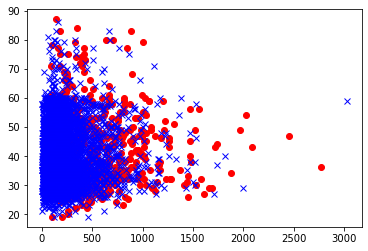

In [9]:
#plot each class separately
plt.plot(x.loc[y=='yes', 'duration'], x.loc[y=='yes', 'age'], 'ro')
plt.plot(x.loc[y=='no', 'duration'], x.loc[y=='no', 'age'], 'bx')

In [10]:

#tr size vs accuracy
accuracies = np.zeros(7)
f1scores = np.zeros(7)

In [11]:
cur_ite = 0
for i in range(10, 80, 10):
    print(i)
    shuffled_data = shuffle(mydata)
    x = shuffled_data.iloc[:, : -1]
    y = shuffled_data.iloc[:, -1]
    
    #split dataset into train and test splits
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = (100-i)/100, random_state = 0)

    #naive bayes is fitted to the dataset
    gnb = GaussianNB()
    my_nb = gnb.fit(x_train, y_train)
    y_pred = my_nb.predict(x_test)

    accuracies[cur_ite] = sum(y_pred == y_test) / y_test.shape[0]
    f1scores[cur_ite] = f1_score(y_test, y_pred, pos_label = 'yes')
    print(accuracies[cur_ite])
    print(f1scores[cur_ite])
    cur_ite = cur_ite + 1


10
0.8790857704595724
0.3819095477386934
20
0.8822228366049212
0.3660714285714286
30
0.8783570300157978
0.3485617597292724
40
0.8849981570217471
0.368421052631579
50
0.8788146837682441
0.36574074074074076
60
0.8872305140961857
0.3376623376623377
70
0.8813559322033898
0.3481781376518218


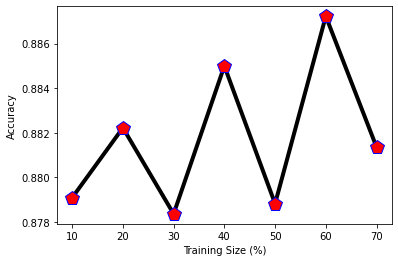

In [12]:
x_axis = range(10, 80, 10)
plt.plot(x_axis, accuracies, '-p', color='black',
         markersize=15, linewidth=4,
         markerfacecolor='red',
         markeredgecolor='blue')
plt.xlabel("Training Size (%)")
plt.ylabel("Accuracy")
plt.show()

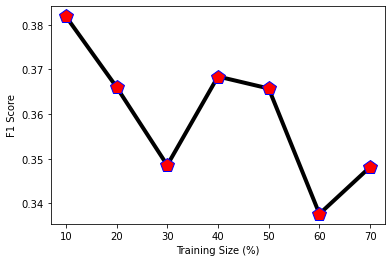

In [13]:
x_axis = range(10, 80, 10)
plt.plot(x_axis, f1scores, '-p', color='black',
         markersize=15, linewidth=4,
         markerfacecolor='red',
         markeredgecolor='blue')
plt.xlabel("Training Size (%)")
plt.ylabel("F1 Score")
plt.show()